In [68]:
pip install scikit-image

## Loading and displaying original and grayscale images

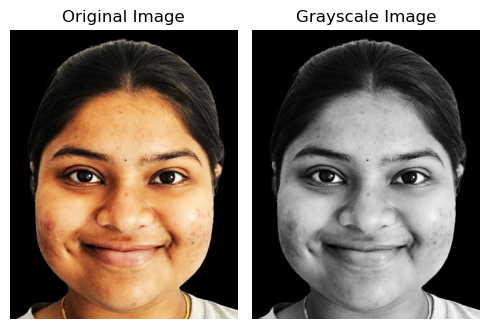

In [274]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature

# Loading my image
myImagePath = 'C:/Users/Nutan/Downloads/nutan88.jpg'
mySignImagePath = 'C:/Users/Nutan/Downloads/NutanSign2.jpg'
myImage= io.imread(myImagePath)
mySignImage= io.imread(mySignImagePath)


# Cropping the image
startRow, startCol, endRow, endCol = 0, 50, 445, 400  
myCroppedImage = myImage[startRow:endRow, startCol:endCol]

# Cropping the Signature image
startRowSign, startColSign, endRowSign, endColSign = 0, 15, 445, 400  
myCroppedSignImage = mySignImage[startRowSign:endRowSign, startColSign:endColSign]

# Converting my original image to grayscale
myGrayImage = color.rgb2gray(myCroppedImage)

# Displaying the Original and Grayscale images
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(5, 5))

# Original image
axes[0].imshow(myCroppedImage, cmap='gray')
axes[0].set_title('Original Image')

# Grayscale image
axes[1].imshow(myGrayImage, cmap='gray')
axes[1].set_title('Grayscale Image')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Displaying images after applying pre-exisiting edge detection methods

In [84]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


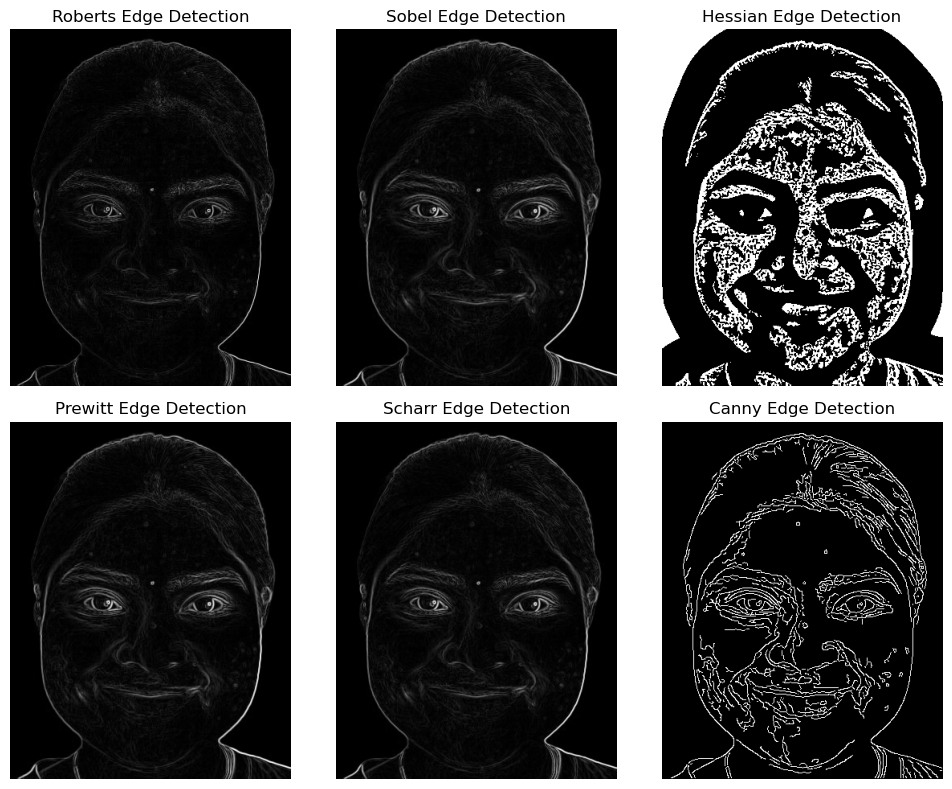

In [273]:
edge_roberts = filters.roberts(myGrayImage)
edge_sobel = filters.sobel(myGrayImage)
edge_hessian = filters.hessian(myGrayImage)
edge_prewitt = filters.prewitt(myGrayImage)
edge_scharr = filters.scharr(myGrayImage)
edge_canny = feature.canny(myGrayImage)

# Displaying edge-detected images using pre-existing edge detection methods
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True,figsize=(10, 8))

axes[0, 0].imshow(edge_roberts, cmap='gray')
axes[0, 0].set_title('Roberts Edge Detection')
axes[0, 1].imshow(edge_sobel, cmap='gray')
axes[0, 1].set_title('Sobel Edge Detection')
axes[0,2].imshow(edge_hessian, cmap='gray')
axes[0,2].set_title('Hessian Edge Detection')
axes[1,0].imshow(edge_prewitt, cmap='gray')
axes[1,0].set_title('Prewitt Edge Detection')
axes[1,1].imshow(edge_scharr, cmap='gray')
axes[1,1].set_title('Scharr Edge Detection')
axes[1,2].imshow(edge_canny, cmap='gray')
axes[1,2].set_title('Canny Edge Detection')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Applying K- Means for segmentation

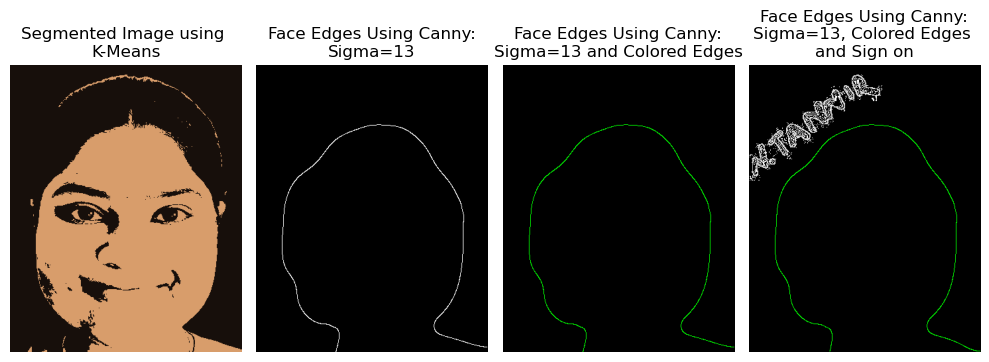

In [298]:
myPixels = myCroppedImage.reshape(-1, myCroppedImage.shape[-1])

# Applying K-means clustering method for segmentation
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(myPixels)
segmentedImageKMeans = kmeans.cluster_centers_[kmeans.labels_]
segmentedImageKMeans = segmentedImageKMeans.reshape(myCroppedImage.shape).astype(np.uint8)

# Converting the segmented image to grayscale
segmentedGrayImage = color.rgb2gray(segmentedImageKMeans)

# Assuming the face is in the cluster with the highest average pixel value
faceClusterLabel = np.argmax(np.mean(segmentedImageKMeans.reshape(-1, 3), axis=0))
faceMask = (kmeans.labels_.reshape(myCroppedImage.shape[:2]) == faceClusterLabel)

# Applying Canny edge detection method on the segmented face cluster
faceEdges = feature.canny(faceMask, sigma=13)

# Creating an RGB image to colorize the edges
coloredEdges = np.zeros((*faceEdges.shape, 3), dtype=np.uint8)
coloredEdges[faceEdges] = [0, 255, 0]  

# Overlay the signature on the top left corner of the colored edges image
overlayImage = np.copy(colored_edges)
sig_height, sig_width = myCroppedSignImage.shape[:2]

y_offset = 0
x_offset = 0

for y in range(sig_height):
    for x in range(sig_width):
        if y + y_offset < overlayImage.shape[0] and x + x_offset < overlayImage.shape[1]:
            if np.any(myCroppedSignImage[y, x] != [255, 255, 255]):  
                overlayImage[y + y_offset, x + x_offset] = myCroppedSignImage[y, x]

# Displaying edge-detected images
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True,figsize=(10, 8))

# Displaying the segmented image
axes[0].imshow(segmentedImageKMeans, cmap='gray')
axes[0].set_title('Segmented Image using \nK-Means')

# Displaying the edge-detected face
axes[1].imshow(faceEdges, cmap='gray')
axes[1].set_title('Face Edges Using Canny:\nSigma=13')

# Displaying the colored edges
axes[2].imshow(coloredEdges)
axes[2].set_title('Face Edges Using Canny:\nSigma=13 and Colored Edges')

# Displaying the colored edges with sign-on
axes[3].imshow(overlayImage)
axes[3].set_title('Face Edges Using Canny:\nSigma=13, Colored Edges \nand Sign on')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Exploring other Methods of Segmentation :

## Applying Felzenszwalb's graph-based segmentation

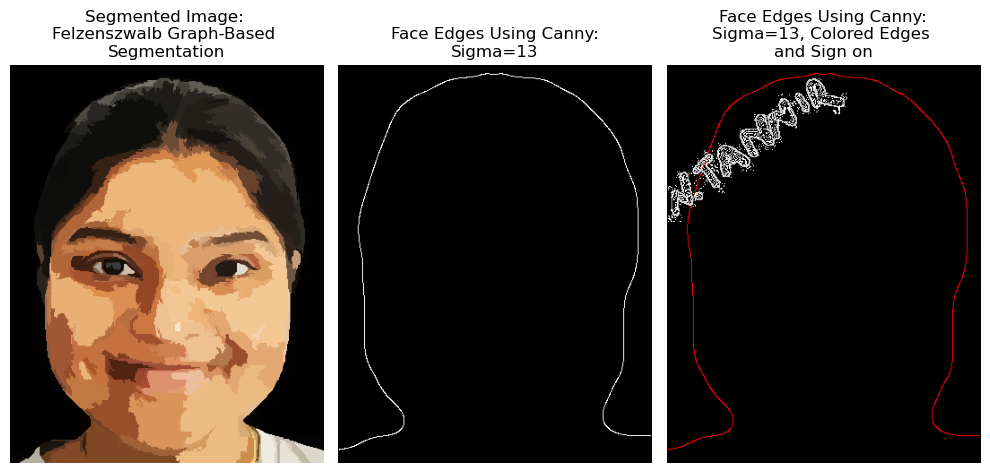

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, feature, segmentation

# Applying Felzenszwalb's graph-based segmentation
segments = segmentation.felzenszwalb(myCroppedImage, scale=100, sigma=0.5, min_size=50)

# Creating segmented image
segmentedImageGraph = color.label2rgb(segments, myCroppedImage, kind='avg')

# Converting the segmented image to grayscale
segmentedGrayImage = color.rgb2gray(segmentedImageGraph)

# Assuming the face is in the largest segment
largestSegment = np.argmax(np.bincount(segments.flat))
faceMask = (segments == largestSegment)

# Applying Canny edge detection on the segmented face cluster
faceEdgesGraph = feature.canny(faceMask, sigma=13)

# Creating an RGB image to colorize the edges
coloredEdgesGraph = np.zeros((*faceEdgesGraph.shape, 3), dtype=np.uint8)
coloredEdgesGraph[faceEdgesGraph] = [255, 0, 0] 

# Overlaying the signature on the top left corner of the colored edges image
overlayImageGraph = np.copy(coloredEdgesGraph)
sigHeightGraph, sigWidthGraph = myCroppedSignImage.shape[:2]

yOffsetGraph = 0
xOffsetGraph = 0

for y in range(sigHeightGraph):
    for x in range(sigWidthGraph):
        if y + yOffsetGraph < overlayImageGraph.shape[0] and x + xOffsetGraph < overlayImageGraph.shape[1]:
            if np.any(myCroppedSignImage[y, x] != [255, 255, 255]):  
                overlayImageGraph[y + yOffsetGraph, x + xOffsetGraph] = myCroppedSignImage[y, x]
                 
# Displaying the images
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True,figsize=(10, 8))

# Displaying the segmented image
axes[0].imshow(segmentedImageGraph, cmap='gray')
axes[0].set_title('Segmented Image: \nFelzenszwalb Graph-Based \nSegmentation')

# Display the edge-detected face
axes[1].imshow(faceEdgesGraph, cmap='gray')
axes[1].set_title('Face Edges Using Canny:\nSigma=13')

# Display the edge-detected face with Sign on
axes[2].imshow(overlayImageGraph, cmap='gray')
axes[2].set_title('Face Edges Using Canny:\nSigma=13, Colored Edges \nand Sign on')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Applying Otsu's thresholding for histogram-based segmentation

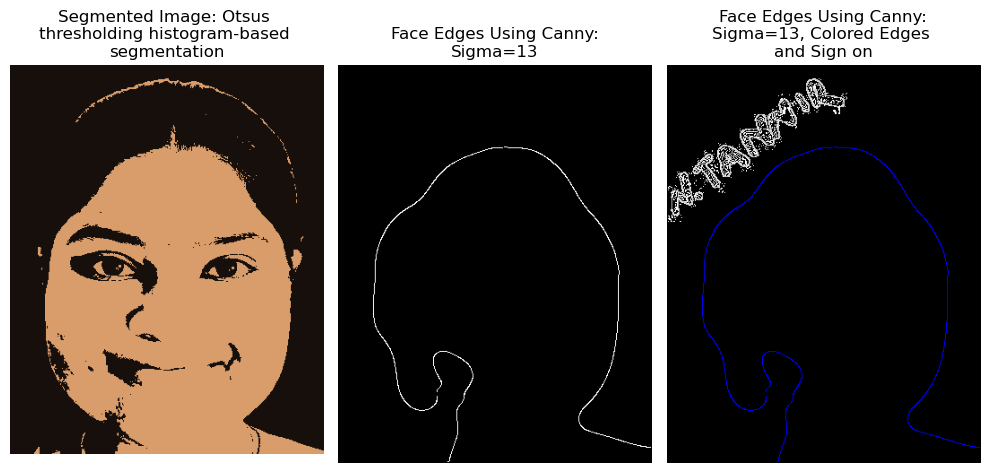

In [295]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, feature

# Converting the cropped image to grayscale
croppedGrayImage = color.rgb2gray(myCroppedImage)

# Applying Otsu's thresholding for histogram-based segmentation
thresh = filters.threshold_otsu(croppedGrayImage)
binaryMask = croppedGrayImage > thresh

# Applying Canny edge detection on the segmented face 
faceEdgesOtsu = feature.canny(binaryMask, sigma=13)  

# Creating an RGB image to colorize the edges
coloredEdgesOtsu = np.zeros((*faceEdgesOtsu.shape, 3), dtype=np.uint8)
coloredEdgesOtsu[faceEdgesOtsu] = [0, 0, 255] 

# Overlaying the signature on the top left corner of the colored edges image
overlayImageOtsu = np.copy(coloredEdgesOtsu)
sigHeightOtsu, sigWidthGraphOtsu = myCroppedSignImage.shape[:2]

yOffsetOtsu = 0
xOffsetOtsu = 0

for y in range(sigHeightOtsu):
    for x in range(sigWidthGraphOtsu):
        if y + yOffsetOtsu < overlayImageOtsu.shape[0] and x + xOffsetGraph < overlayImageOtsu.shape[1]:
            if np.any(myCroppedSignImage[y, x] != [255, 255, 255]):  
                overlayImageOtsu[y + yOffsetOtsu, x + xOffsetOtsu] = myCroppedSignImage[y, x]

# Displaying the images
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True,figsize=(10, 8))

# Displaying the segmented image
axes[0].imshow(segmented_img, cmap='gray')
axes[0].set_title('Segmented Image: Otsus \nthresholding histogram-based \nsegmentation')

# Displaying the edge-detected face
axes[1].imshow(faceEdgesOtsu, cmap='gray')
axes[1].set_title('Face Edges Using Canny:\nSigma=13')

# Displaying the edge-detected face
axes[2].imshow(overlayImageOtsu, cmap='gray')
axes[2].set_title('Face Edges Using Canny:\nSigma=13, Colored Edges \nand Sign on')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Displaying Images alltogether

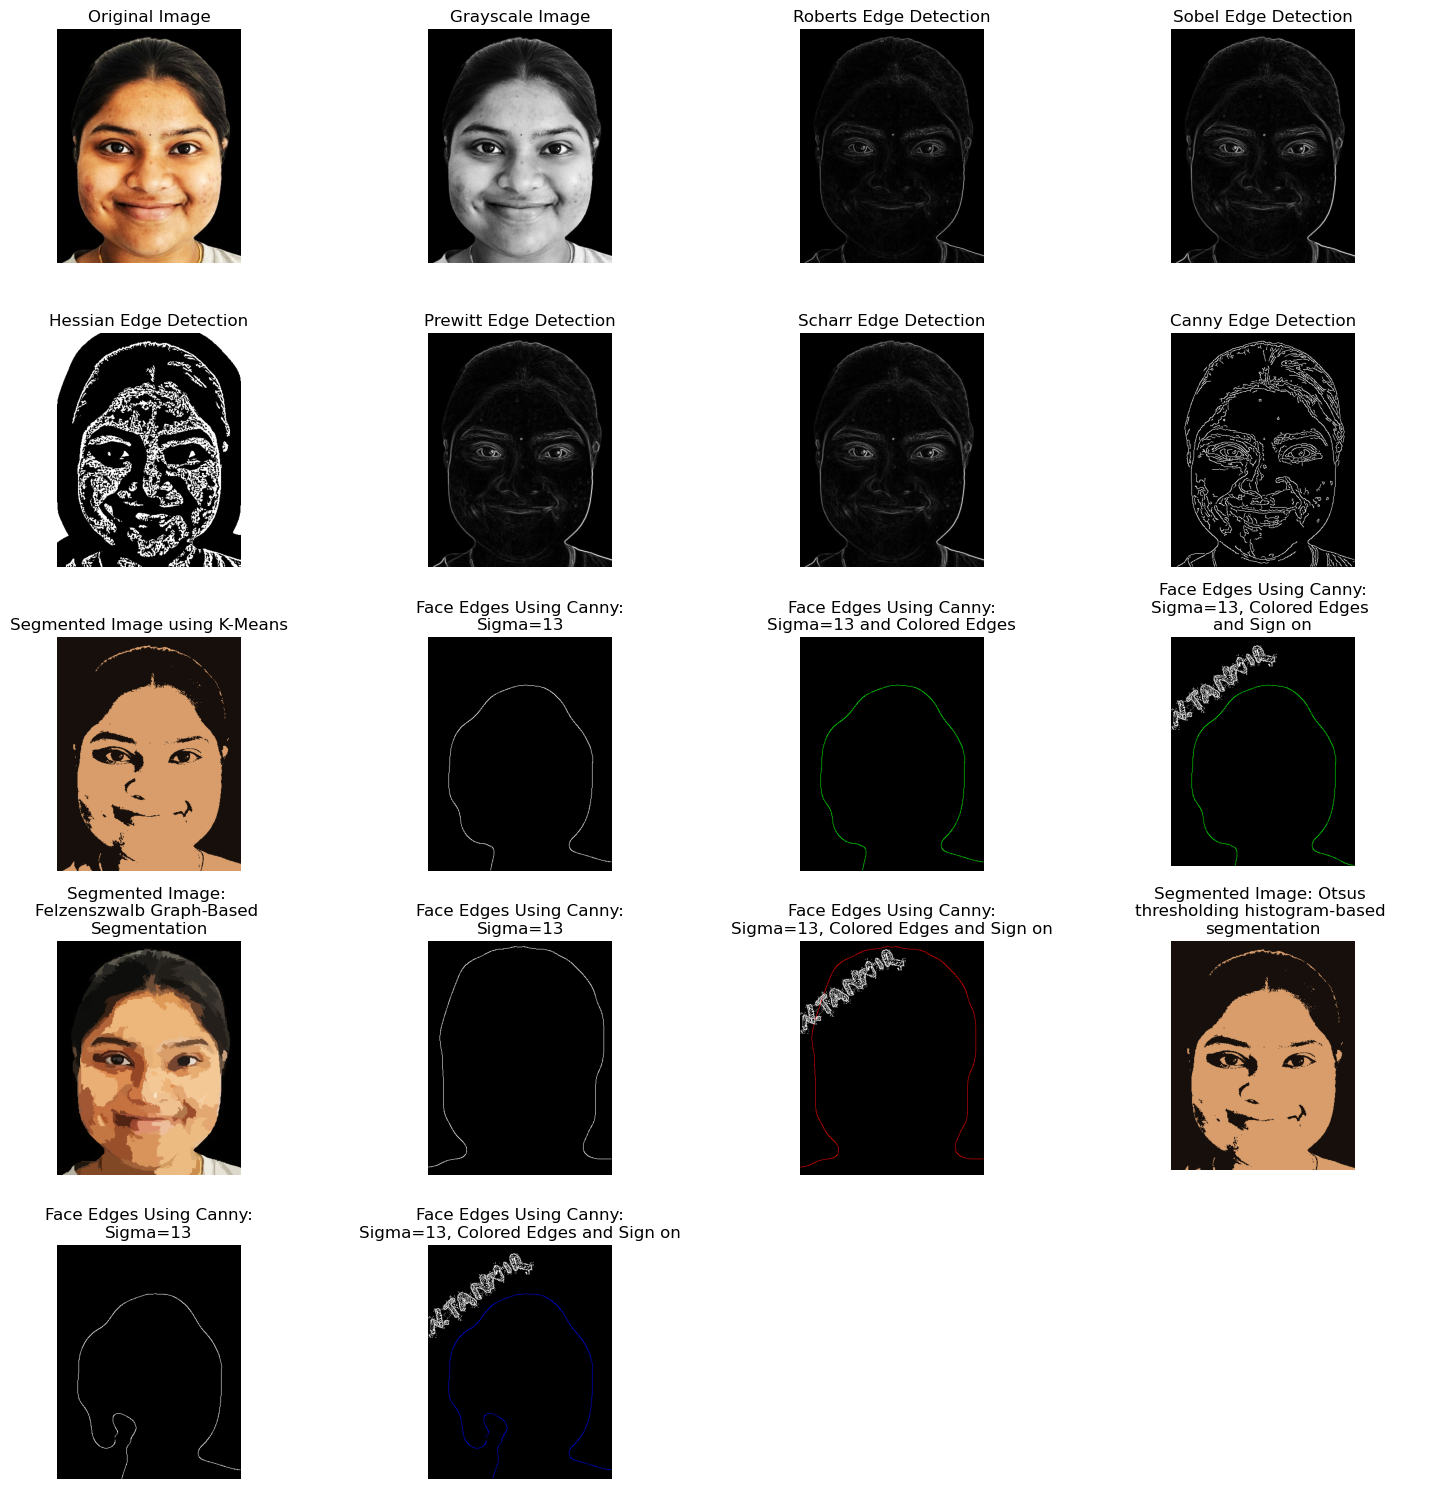

In [297]:
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True,figsize=(15, 15))

axes[0,0].imshow(myCroppedImage, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,1].imshow(myGrayImage, cmap='gray')
axes[0,1].set_title('Grayscale Image')
axes[0,2].imshow(edge_roberts, cmap='gray')
axes[0,2].set_title('Roberts Edge Detection')
axes[0,3].imshow(edge_sobel, cmap='gray')
axes[0,3].set_title('Sobel Edge Detection')
axes[1,0].imshow(edge_hessian, cmap='gray')
axes[1,0].set_title('Hessian Edge Detection')
axes[1,1].imshow(edge_prewitt, cmap='gray')
axes[1,1].set_title('Prewitt Edge Detection')
axes[1,2].imshow(edge_scharr, cmap='gray')
axes[1,2].set_title('Scharr Edge Detection')
axes[1,3].imshow(edge_canny, cmap='gray')
axes[1,3].set_title('Canny Edge Detection')
axes[2,0].imshow(segmentedImageKMeans, cmap='gray')
axes[2,0].set_title('Segmented Image using K-Means')
axes[2,1].imshow(faceEdges, cmap='gray')
axes[2,1].set_title('Face Edges Using Canny:\nSigma=13')
axes[2,2].imshow(coloredEdges, cmap='gray')
axes[2,2].set_title('Face Edges Using Canny:\nSigma=13 and Colored Edges')
axes[2,3].imshow(overlayImage, cmap='gray')
axes[2,3].set_title('Face Edges Using Canny:\nSigma=13, Colored Edges \nand Sign on')
axes[3,0].imshow(segmentedImageGraph, cmap='gray')
axes[3,0].set_title('Segmented Image: \nFelzenszwalb Graph-Based \nSegmentation')
axes[3,1].imshow(faceEdgesGraph, cmap='gray')
axes[3,1].set_title('Face Edges Using Canny:\nSigma=13')
axes[3,2].imshow(overlayImageGraph, cmap='gray')
axes[3,2].set_title('Face Edges Using Canny:\nSigma=13, Colored Edges and Sign on')
axes[3,3].imshow(segmented_img, cmap='gray')
axes[3,3].set_title('Segmented Image: Otsus \nthresholding histogram-based \nsegmentation')
axes[4,0].imshow(faceEdgesOtsu, cmap='gray')
axes[4,0].set_title('Face Edges Using Canny:\nSigma=13')
axes[4,1].imshow(overlayImageOtsu, cmap='gray')
axes[4,1].set_title('Face Edges Using Canny:\nSigma=13, Colored Edges and Sign on')


for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()
